In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [6]:
df_20_04_candidate= pd.read_csv("candidate_2000_2004_contributors_audt_e.csv",encoding='latin-1')
df_20_04_party=pd.read_csv("party_annual_2000-2004_contributors_e.csv",encoding='latin-1')
df_93_99_candidate=pd.read_csv("candidate_pre_2000_contributors_e.csv",encoding='latin-1')
df_93_99_party=pd.read_csv("party_annual_1993-2000_contributors_e.csv",encoding='latin-1')
df_current=pd.read_csv("od_cntrbtn_audt_e.csv",low_memory=False,encoding='latin-1')

# Analysing columns 

In [7]:
# columns for 1993 CANDIDATE
df_93_99_candidate.columns

Index(['Political Entity', 'Recipient ID', 'Recipient', 'Political Party',
       'Electoral District', 'Electoral event', 'Fiscal date', 'Form ID',
       'Financial Report', 'Part Number of Return', 'Financial Report part',
       'Contributor type', ' Contributor name', 'Monetary amount',
       'Non-Monetary amount'],
      dtype='object')

In [8]:
# columns for 1993 PARTY
df_93_99_party.columns

Index(['Political Entity', 'Recipient ID', 'Recipient', 'Political Party',
       'Electoral event', 'Fiscal date', 'Financial Report',
       'Financial Report part', 'Contributor type', ' Contributor name',
       ' Contributor last name', ' Contributor first name',
       'Contribution amount'],
      dtype='object')

In [9]:
# columns for 2004 CANDIDATE
df_20_04_candidate.columns

Index(['Political Entity', 'Recipient ID', 'Recipient', ' Recipient last name',
       ' Recipient first name', ' Recipient middle initial', 'Political Party',
       'Electoral District', 'Electoral event', 'Fiscal date', 'Form ID',
       'Financial Report', 'Part Number of Return', 'Financial Report part',
       'Contributor type', ' Contributor name', 'Contributor City',
       'Contributor Province', 'Contributor Postal code', 'Monetary amount',
       'Non-Monetary amount',
       'Type of organization that contribution was given through',
       'Contribution given through',
       'Address of organization that contribution was given through'],
      dtype='object')

In [10]:
# columns for 2004 PARTY
df_20_04_party.columns

Index(['Political Entity', 'Recipient ID', 'Recipient', 'Political Party',
       'Electoral event', 'Fiscal date', 'Form ID', 'Financial Report',
       'Part Number of Return', 'Financial Report part', 'Contributor type',
       ' Contributor name', ' Contributor last name',
       ' Contributor first name', 'Contributor City', 'Contributor Province',
       'Contributor Postal code', 'Monetary amount', 'Non-Monetary amount',
       'Type of organization that contribution was given through',
       'Contribution given through'],
      dtype='object')

In [11]:
# columns for current dataset
df_current.columns

Index(['ï»¿Political Entity', 'Recipient ID', 'Recipient',
       'Recipient last name', 'Recipient first name',
       'Recipient middle initial', 'Political Party of Recipient',
       'Electoral District', 'Electoral event', 'Fiscal/Election date',
       'Form ID', 'Financial Report', 'Part Number of Return',
       'Financial Report part', 'Contributor type', 'Contributor name',
       'Contributor last name', 'Contributor first name',
       'Contributor middle initial', 'Contributor City',
       'Contributor Province', 'Contributor Postal code',
       'Contribution Received date', 'Monetary amount', 'Non-Monetary amount',
       'Contribution given through'],
      dtype='object')

# Preprocessing

### 1. Dropping Repeated columns

In [12]:
#Dropping columns in 93 99 dataset
df_93_99_party=df_93_99_party.drop(columns=[' Contributor last name',' Contributor first name'])

# Dropping columns in 20 04 dataset
df_20_04_party=df_20_04_party.drop(columns=[' Contributor last name',' Contributor first name'])



# Dropping columns in the current dataset
df_current=df_current.drop(columns=['Contributor last name','Contributor first name', 'Contributor middle initial'])


df_20_04_party.head()

,Political Entity,Recipient ID,Recipient,Political Party,Electoral event,Fiscal date,Form ID,Financial Report,Part Number of Return,Financial Report part,Contributor type,Contributor name,Contributor City,Contributor Province,Contributor Postal code,Monetary amount,Non-Monetary amount,Type of organization that contribution was given through,Contribution given through
0,Registered Party,1,Liberal Party of Canada,Liberal Party of Canada,Annual,2001-12-31,20239,Political Party Financial Transactions Return,4,Statement of contributions received: Details o...,Businesses / Commercial organizations,William 10675 Newfoundland Inc. / Case,St. Johns,NF,A1C 5W1,438.95,0.0,NaN,NaN
1,Registered Party,1,Liberal Party of Canada,Liberal Party of Canada,Annual,2001-12-31,20239,Political Party Financial Transactions Return,4,Statement of contributions received: Details o...,Businesses / Commercial organizations,Sandy 1161925 Ontario Inc. / Abbott,Picton,ON,K0K 2T0,1000.00,0.0,NaN,NaN
2,Registered Party,1,Liberal Party of Canada,Liberal Party of Canada,Annual,2001-12-31,20239,Political Party Financial Transactions Return,4,Statement of contributions received: Details o...,Businesses / Commercial organizations,Terrence 1197528 Ontario Inc. / Guildbault,Ottawa,ON,K1P 6K7,1000.00,0.0,NaN,NaN
3,Registered Party,1,Liberal Party of Canada,Liberal Party of Canada,Annual,2001-12-31,20239,Political Party Financial Transactions Return,4,Statement of contributions received: Details o...,Businesses / Commercial organizations,Raymond 1221858 Ontario Inc. / Peterkin,Ottawa,ON,K1Z 6W2,400.00,0.0,NaN,NaN
4,Registered Party,1,Liberal Party of Canada,Liberal Party of Canada,Annual,2001-12-31,20239,Political Party Financial Transactions Return,4,Statement of contributions received: Details o...,Businesses / Commercial organizations,Julius 127354 Canada Inc. / Sternthal,Mont-Royal,QC,H4P 1P7,434.63,0.0,NaN,NaN


In [13]:
#Dropping the columns in candadaite ttable
df_20_04_candidate=df_20_04_candidate.drop(columns=[' Recipient last name', ' Recipient first name',
       ' Recipient middle initial'])

### 2.  Adding Primary key

In [14]:
# Adding primary keys for 1993-99 dataset
df_93_99_party["Table_Index_Key"]=df_93_99_party.index
df_93_99_party['Table_Index_Key'] = '93_99_party'
df_93_99_candidate["Table_Index_Key"]=df_93_99_candidate.index
df_93_99_candidate['Table_Index_Key'] = '93_99_candidate'

# Adding primary keys for 2000-2004 dataset
df_20_04_party["Table_Index_Key"]=df_20_04_party.index
df_20_04_party['Table_Index_Key'] = '20_04_party'
df_20_04_candidate["Table_Index_Key"]=df_20_04_candidate.index
df_20_04_candidate['Table_Index_Key'] = '20_04_candidate'


In [15]:
df_20_04_candidate.head()

,Political Entity,Recipient ID,Recipient,Political Party,Electoral District,Electoral event,Fiscal date,Form ID,Financial Report,Part Number of Return,...,Contributor name,Contributor City,Contributor Province,Contributor Postal code,Monetary amount,Non-Monetary amount,Type of organization that contribution was given through,Contribution given through,Address of organization that contribution was given through,Table_Index_Key
0,Candidate,1,"Morgan, Jim",Progressive Conservative Party of Canada,Bonavista--Trinity--Conception,THIRTY-SEVENTH GENERAL ELECTION,2000-11-27,20120,Candidate's Electoral Campaign Return,5,...,Provincial Paving Ltd.,St. John's,NF,A1A 4G7,500.0,NaN,NaN,NaN,NaN,20_04_candidate
1,Candidate,1,"Morgan, Jim",Progressive Conservative Party of Canada,Bonavista--Trinity--Conception,THIRTY-SEVENTH GENERAL ELECTION,2000-11-27,20120,Candidate's Electoral Campaign Return,5,...,J-1 Contracting Ltd.,Clarenville,NF,A0E 1J0,1000.0,NaN,NaN,NaN,NaN,20_04_candidate
2,Candidate,1,"Morgan, Jim",Progressive Conservative Party of Canada,Bonavista--Trinity--Conception,THIRTY-SEVENTH GENERAL ELECTION,2000-11-27,20120,Candidate's Electoral Campaign Return,5,...,Fewers Funeral Home Ltd.,Clarenville,NF,A0E 1J0,500.0,NaN,NaN,NaN,NaN,20_04_candidate
3,Candidate,1,"Morgan, Jim",Progressive Conservative Party of Canada,Bonavista--Trinity--Conception,THIRTY-SEVENTH GENERAL ELECTION,2000-11-27,20120,Candidate's Electoral Campaign Return,5,...,Five Bays Lodge,Clarenville,NF,A0E 1J0,500.0,NaN,NaN,NaN,NaN,20_04_candidate
4,Candidate,1,"Morgan, Jim",Progressive Conservative Party of Canada,Bonavista--Trinity--Conception,THIRTY-SEVENTH GENERAL ELECTION,2000-11-27,20120,Candidate's Electoral Campaign Return,5,...,David McKay,St. John's,NF,A1E 4Y3,1000.0,NaN,NaN,NaN,NaN,20_04_candidate


### 3. Retrieving common columns

In [16]:
def get_common_elements_solo(df1,df2):
    col1=df1.columns
    col2=df2.columns
    set1 = set(col1)
    set2 = set(col2)
    
    intersection1 = set1.intersection(set2)

    intersection_as_list = list(intersection1)
    
    return intersection_as_list


# Function call for 1993-1997 dataset
common_columns_93_99=get_common_elements_solo(df_93_99_party,df_93_99_candidate)

# Function call for 2000-2004 dataset
common_columns_20_24=get_common_elements_solo(df_20_04_party,df_20_04_candidate)

In [17]:
common_columns_93_99

[' Contributor name',
 'Financial Report',
 'Electoral event',
 'Recipient',
 'Fiscal date',
 'Recipient ID',
 'Political Party',
 'Political Entity',
 'Table_Index_Key',
 'Financial Report part',
 'Contributor type']

In [18]:
common_columns_20_24

[' Contributor name',
 'Recipient',
 'Contributor Postal code',
 'Contribution given through',
 'Financial Report part',
 'Contributor type',
 'Contributor City',
 'Financial Report',
 'Recipient ID',
 'Contributor Province',
 'Non-Monetary amount',
 'Political Party',
 'Type of organization that contribution was given through',
 'Table_Index_Key',
 'Form ID',
 'Part Number of Return',
 'Electoral event',
 'Fiscal date',
 'Monetary amount',
 'Political Entity']

### 4. Rearrange Dataframe based on common columns

In [19]:
# For 1993-1997 dataset
df_93_99_party_common=df_93_99_party[['Recipient',
 'Political Party',
 'Contributor type',
 ' Contributor name',
 'Financial Report',
 'Recipient ID',
 'Financial Report part',
 'Political Entity',
 'Fiscal date',
 'Table_Index_Key',
 'Electoral event']]

df_93_99_candidate_common=df_93_99_candidate[['Recipient',
 'Political Party',
 'Contributor type',
 ' Contributor name',
 'Financial Report',
 'Recipient ID',
 'Financial Report part',
 'Political Entity',
 'Fiscal date',
 'Table_Index_Key',
 'Electoral event']]


# for 2000-2004 dataset
df_20_04_party_common=df_20_04_party[['Recipient',
 ' Contributor name',
 'Contribution given through',
 'Political Entity',
 'Non-Monetary amount',
 'Political Party',
 'Financial Report',
 'Part Number of Return',
 'Contributor City',
 'Contributor type',
 'Form ID',
 'Fiscal date',
 'Contributor Province',
 'Contributor Postal code',
 'Monetary amount',
 'Type of organization that contribution was given through',
 'Recipient ID',
 'Financial Report part',
 'Table_Index_Key',
 'Electoral event']]



df_20_04_candidate_common=df_20_04_candidate[['Recipient',
 ' Contributor name',
 'Contribution given through',
 'Political Entity',
 'Non-Monetary amount',
 'Political Party',
 'Financial Report',
 'Part Number of Return',
 'Contributor City',
 'Contributor type',
 'Form ID',
 'Fiscal date',
 'Contributor Province',
 'Contributor Postal code',
 'Monetary amount',
 'Type of organization that contribution was given through',
 'Recipient ID',
 'Financial Report part',
 'Table_Index_Key',
 'Electoral event']]

In [20]:
df_93_99_party_common.head()

,Recipient,Political Party,Contributor type,Contributor name,Financial Report,Recipient ID,Financial Report part,Political Entity,Fiscal date,Table_Index_Key,Electoral event
0,Liberal Party of Canada,Liberal Party of Canada,Individuals,Wilhemina Vancise,Registered Political Parties Fiscal Period Ret...,600,Contributions to Political Parties,Registered Party,1993-12-31,93_99_party,Annual
1,Liberal Party of Canada,Liberal Party of Canada,Individuals,George W. Vandenberg,Registered Political Parties Fiscal Period Ret...,600,Contributions to Political Parties,Registered Party,1993-12-31,93_99_party,Annual
2,Liberal Party of Canada,Liberal Party of Canada,Individuals,Hubert A. Vandenberg,Registered Political Parties Fiscal Period Ret...,600,Contributions to Political Parties,Registered Party,1993-12-31,93_99_party,Annual
3,Liberal Party of Canada,Liberal Party of Canada,Individuals,Martin W. VanDenKerkhof,Registered Political Parties Fiscal Period Ret...,600,Contributions to Political Parties,Registered Party,1993-12-31,93_99_party,Annual
4,Liberal Party of Canada,Liberal Party of Canada,Individuals,John Vander Kaay,Registered Political Parties Fiscal Period Ret...,600,Contributions to Political Parties,Registered Party,1993-12-31,93_99_party,Annual


In [21]:
df_93_99_party.head()

,Political Entity,Recipient ID,Recipient,Political Party,Electoral event,Fiscal date,Financial Report,Financial Report part,Contributor type,Contributor name,Contribution amount,Table_Index_Key
0,Registered Party,600,Liberal Party of Canada,Liberal Party of Canada,Annual,1993-12-31,Registered Political Parties Fiscal Period Ret...,Contributions to Political Parties,Individuals,Wilhemina Vancise,500.00,93_99_party
1,Registered Party,600,Liberal Party of Canada,Liberal Party of Canada,Annual,1993-12-31,Registered Political Parties Fiscal Period Ret...,Contributions to Political Parties,Individuals,George W. Vandenberg,922.50,93_99_party
2,Registered Party,600,Liberal Party of Canada,Liberal Party of Canada,Annual,1993-12-31,Registered Political Parties Fiscal Period Ret...,Contributions to Political Parties,Individuals,Hubert A. Vandenberg,200.00,93_99_party
3,Registered Party,600,Liberal Party of Canada,Liberal Party of Canada,Annual,1993-12-31,Registered Political Parties Fiscal Period Ret...,Contributions to Political Parties,Individuals,Martin W. VanDenKerkhof,242.22,93_99_party
4,Registered Party,600,Liberal Party of Canada,Liberal Party of Canada,Annual,1993-12-31,Registered Political Parties Fiscal Period Ret...,Contributions to Political Parties,Individuals,John Vander Kaay,150.00,93_99_party


### Drop Common Dataframe from original

In [22]:
# For 1993-1997 dataset
df_93_99_party=df_93_99_party.drop(columns=['Recipient',
 'Political Party',
 'Contributor type',
 ' Contributor name',
 'Financial Report',
 'Recipient ID',
 'Financial Report part',
 'Political Entity',
 'Fiscal date',
 'Electoral event'])

df_93_99_candidate=df_93_99_candidate.drop(columns=['Recipient',
 'Political Party',
 'Contributor type',
 ' Contributor name',
 'Financial Report',
 'Recipient ID',
 'Financial Report part',
 'Political Entity',
 'Fiscal date',
 'Electoral event'])


# for 2000-2004 dataset
df_20_04_party=df_20_04_party.drop(columns=['Recipient',
 ' Contributor name',
 'Contribution given through',
 'Political Entity',
 'Non-Monetary amount',
 'Political Party',
 'Financial Report',
 'Part Number of Return',
 'Contributor City',
 'Contributor type',
 'Form ID',
 'Fiscal date',
 'Contributor Province',
 'Contributor Postal code',
 'Monetary amount',
 'Type of organization that contribution was given through',
 'Recipient ID',
 'Financial Report part',
 'Electoral event'])


df_20_04_candidate=df_20_04_candidate.drop(columns=['Recipient',
 ' Contributor name',
 'Contribution given through',
 'Political Entity',
 'Non-Monetary amount',
 'Political Party',
 'Financial Report',
 'Part Number of Return',
 'Contributor City',
 'Contributor type',
 'Form ID',
 'Fiscal date',
 'Contributor Province',
 'Contributor Postal code',
 'Monetary amount',
 'Type of organization that contribution was given through',
 'Recipient ID',
 'Financial Report part',
 'Electoral event'])

# Append common dataframes

In [23]:
# Append
df_93_99_common = df_93_99_candidate_common.append(df_93_99_party_common, ignore_index=True)
df_20_04_common = df_20_04_candidate_common.append(df_20_04_party_common, ignore_index=True)
df_20_04_common.head()

,Recipient,Contributor name,Contribution given through,Political Entity,Non-Monetary amount,Political Party,Financial Report,Part Number of Return,Contributor City,Contributor type,Form ID,Fiscal date,Contributor Province,Contributor Postal code,Monetary amount,Type of organization that contribution was given through,Recipient ID,Financial Report part,Table_Index_Key,Electoral event
0,"Morgan, Jim",Provincial Paving Ltd.,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,St. John's,Businesses / Commercial organizations,20120,2000-11-27,NF,A1A 4G7,500.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
1,"Morgan, Jim",J-1 Contracting Ltd.,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,1000.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
2,"Morgan, Jim",Fewers Funeral Home Ltd.,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,500.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
3,"Morgan, Jim",Five Bays Lodge,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,500.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
4,"Morgan, Jim",David McKay,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,St. John's,Individuals,20120,2000-11-27,NF,A1E 4Y3,1000.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION


In [24]:
del df_93_99_party_common
del df_93_99_candidate_common
del df_20_04_party_common
del df_20_04_candidate_common

### Info About the Data Frames

In [25]:
df_20_04_party.columns

Index(['Table_Index_Key'], dtype='object')

In [26]:
df_20_04_candidate.columns

Index(['Electoral District',
       'Address of organization that contribution was given through',
       'Table_Index_Key'],
      dtype='object')

In [27]:
df_20_04_common.columns

Index(['Recipient', ' Contributor name', 'Contribution given through',
       'Political Entity', 'Non-Monetary amount', 'Political Party',
       'Financial Report', 'Part Number of Return', 'Contributor City',
       'Contributor type', 'Form ID', 'Fiscal date', 'Contributor Province',
       'Contributor Postal code', 'Monetary amount',
       'Type of organization that contribution was given through',
       'Recipient ID', 'Financial Report part', 'Table_Index_Key',
       'Electoral event'],
      dtype='object')

In [28]:
df_20_04_common.head()

,Recipient,Contributor name,Contribution given through,Political Entity,Non-Monetary amount,Political Party,Financial Report,Part Number of Return,Contributor City,Contributor type,Form ID,Fiscal date,Contributor Province,Contributor Postal code,Monetary amount,Type of organization that contribution was given through,Recipient ID,Financial Report part,Table_Index_Key,Electoral event
0,"Morgan, Jim",Provincial Paving Ltd.,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,St. John's,Businesses / Commercial organizations,20120,2000-11-27,NF,A1A 4G7,500.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
1,"Morgan, Jim",J-1 Contracting Ltd.,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,1000.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
2,"Morgan, Jim",Fewers Funeral Home Ltd.,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,500.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
3,"Morgan, Jim",Five Bays Lodge,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,500.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION
4,"Morgan, Jim",David McKay,NaN,Candidate,NaN,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,St. John's,Individuals,20120,2000-11-27,NF,A1E 4Y3,1000.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION


In [29]:
df_20_04_common.loc[df_20_04_common['Table_Index_Key'] == "20_04_party"]


,Recipient,Contributor name,Contribution given through,Political Entity,Non-Monetary amount,Political Party,Financial Report,Part Number of Return,Contributor City,Contributor type,Form ID,Fiscal date,Contributor Province,Contributor Postal code,Monetary amount,Type of organization that contribution was given through,Recipient ID,Financial Report part,Table_Index_Key,Electoral event
39920,Liberal Party of Canada,William 10675 Newfoundland Inc. / Case,NaN,Registered Party,0.0,Liberal Party of Canada,Political Party Financial Transactions Return,4,St. Johns,Businesses / Commercial organizations,20239,2001-12-31,NF,A1C 5W1,438.95,NaN,1,Statement of contributions received: Details o...,20_04_party,Annual
39921,Liberal Party of Canada,Sandy 1161925 Ontario Inc. / Abbott,NaN,Registered Party,0.0,Liberal Party of Canada,Political Party Financial Transactions Return,4,Picton,Businesses / Commercial organizations,20239,2001-12-31,ON,K0K 2T0,1000.00,NaN,1,Statement of contributions received: Details o...,20_04_party,Annual
39922,Liberal Party of Canada,Terrence 1197528 Ontario Inc. / Guildbault,NaN,Registered Party,0.0,Liberal Party of Canada,Political Party Financial Transactions Return,4,Ottawa,Businesses / Commercial organizations,20239,2001-12-31,ON,K1P 6K7,1000.00,NaN,1,Statement of contributions received: Details o...,20_04_party,Annual
39923,Liberal Party of Canada,Raymond 1221858 Ontario Inc. / Peterkin,NaN,Registered Party,0.0,Liberal Party of Canada,Political Party Financial Transactions Return,4,Ottawa,Businesses / Commercial organizations,20239,2001-12-31,ON,K1Z 6W2,400.00,NaN,1,Statement of contributions received: Details o...,20_04_party,Annual
39924,Liberal Party of Canada,Julius 127354 Canada Inc. / Sternthal,NaN,Registered Party,0.0,Liberal Party of Canada,Political Party Financial Transactions Return,4,Mont-Royal,Businesses / Commercial organizations,20239,2001-12-31,QC,H4P 1P7,434.63,NaN,1,Statement of contributions received: Details o...,20_04_party,Annual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140933,Marxist-Leninist Party of Canada,D. Starbuck,NaN,Registered Party,0.0,Marxist-Leninist Party of Canada,Political Party Financial Transactions Return,4,Sudbury,Individuals,20239,2001-12-31,ON,P3B 3C4,600.00,NaN,9,Statement of contributions received: Details o...,20_04_party,Annual
140934,Marxist-Leninist Party of Canada,Tim Sullivan,NaN,Registered Party,0.0,Marxist-Leninist Party of Canada,Political Party Financial Transactions Return,4,Mississauga,Individuals,20239,2001-12-31,ON,L5B 2H3,1200.00,NaN,9,Statement of contributions received: Details o...,20_04_party,Annual
140935,Marxist-Leninist Party of Canada,Polyvios Tsakanikas,NaN,Registered Party,0.0,Marxist-Leninist Party of Canada,Political Party Financial Transactions Return,4,Montréal,Individuals,20239,2001-12-31,QC,H3N 1Z5,600.00,NaN,9,Statement of contributions received: Details o...,20_04_party,Annual
140936,Marxist-Leninist Party of Canada,Margaret Villanizar,NaN,Registered Party,0.0,Marxist-Leninist Party of Canada,Political Party Financial Transactions Return,4,Windsor,Individuals,20239,2001-12-31,ON,N9A 5A2,300.00,NaN,9,Statement of contributions received: Details o...,20_04_party,Annual


In [30]:
df_20_04_common.columns

Index(['Recipient', ' Contributor name', 'Contribution given through',
       'Political Entity', 'Non-Monetary amount', 'Political Party',
       'Financial Report', 'Part Number of Return', 'Contributor City',
       'Contributor type', 'Form ID', 'Fiscal date', 'Contributor Province',
       'Contributor Postal code', 'Monetary amount',
       'Type of organization that contribution was given through',
       'Recipient ID', 'Financial Report part', 'Table_Index_Key',
       'Electoral event'],
      dtype='object')

In [31]:
df_93_99_party.columns

Index(['Contribution amount', 'Table_Index_Key'], dtype='object')

In [32]:
df_93_99_candidate['Non-Monetary amount']=df_93_99_candidate['Non-Monetary amount'].fillna(0)
df_93_99_candidate['Non-Monetary amount']

0          359.03
1          120.00
2         2300.75
3         1500.00
4          600.00
           ...   
99996        0.00
99997        0.00
99998        0.00
99999        0.00
100000       0.00
Name: Non-Monetary amount, Length: 100001, dtype: float64

In [33]:
df_93_99_candidate['Monetary amount']=df_93_99_candidate['Monetary amount'].fillna(0)
df_93_99_candidate['Monetary amount']

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
99996      500.0
99997      500.0
99998     1000.0
99999     3145.0
100000    5000.0
Name: Monetary amount, Length: 100001, dtype: float64

In [34]:
df_93_99_common.columns

Index(['Recipient', 'Political Party', 'Contributor type', ' Contributor name',
       'Financial Report', 'Recipient ID', 'Financial Report part',
       'Political Entity', 'Fiscal date', 'Table_Index_Key',
       'Electoral event'],
      dtype='object')

In [35]:
df_93_99_candidate['Contribution amount'] = df_93_99_candidate['Monetary amount']+df_93_99_candidate['Non-Monetary amount']
df_93_99_candidate['Contribution amount']

0          359.03
1          120.00
2         2300.75
3         1500.00
4          600.00
           ...   
99996      500.00
99997      500.00
99998     1000.00
99999     3145.00
100000    5000.00
Name: Contribution amount, Length: 100001, dtype: float64

In [36]:
df_93_99_candidate.drop(columns={'Monetary amount','Non-Monetary amount'},axis=1,inplace=True)

In [37]:
df_93_99_candidate.columns

Index(['Electoral District', 'Form ID', 'Part Number of Return',
       'Table_Index_Key', 'Contribution amount'],
      dtype='object')

In [38]:
df_93_99_common.head()

,Recipient,Political Party,Contributor type,Contributor name,Financial Report,Recipient ID,Financial Report part,Political Entity,Fiscal date,Table_Index_Key,Electoral event
0,"Kozakavich, Michael",N.D.P.,Registered parties,Alberta New Democratic Party/sig,Candidate's Return Respecting Election Expenses,86635,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election
1,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,KANESCO HOLDINGS,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election
2,"Scurfield, Sergei",Progressive Conservative,Individuals,SHAUNA WING,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election
3,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,DARTNELL REDFORD & LUTZ,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election
4,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,KANESCO HOLDINGS,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election


In [39]:
df_93_99_common['Monetary amount']=0


In [40]:
df_93_99_common_copy=df_93_99_common.copy()

In [41]:
df_93_99_common['Monetary amount'].loc[0:100000]=df_93_99_candidate['Contribution amount']
df_93_99_common.head()

C:\Users\dhruv\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Recipient,Political Party,Contributor type,Contributor name,Financial Report,Recipient ID,Financial Report part,Political Entity,Fiscal date,Table_Index_Key,Electoral event,Monetary amount
0,"Kozakavich, Michael",N.D.P.,Registered parties,Alberta New Democratic Party/sig,Candidate's Return Respecting Election Expenses,86635,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,359.03
1,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,KANESCO HOLDINGS,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,120.00
2,"Scurfield, Sergei",Progressive Conservative,Individuals,SHAUNA WING,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,2300.75
3,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,DARTNELL REDFORD & LUTZ,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,1500.00
4,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,KANESCO HOLDINGS,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,600.00


In [42]:
df_93_99_common['Monetary amount'].loc[100001:]=df_93_99_party['Contribution amount']
df_93_99_common.head()

C:\Users\dhruv\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Recipient,Political Party,Contributor type,Contributor name,Financial Report,Recipient ID,Financial Report part,Political Entity,Fiscal date,Table_Index_Key,Electoral event,Monetary amount
0,"Kozakavich, Michael",N.D.P.,Registered parties,Alberta New Democratic Party/sig,Candidate's Return Respecting Election Expenses,86635,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,359.03
1,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,KANESCO HOLDINGS,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,120.00
2,"Scurfield, Sergei",Progressive Conservative,Individuals,SHAUNA WING,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,2300.75
3,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,DARTNELL REDFORD & LUTZ,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,1500.00
4,"Scurfield, Sergei",Progressive Conservative,Businesses / Commercial organizations,KANESCO HOLDINGS,Candidate's Return Respecting Election Expenses,86637,"List of contributors of goods, services, and d...",Candidate,1997-12-15,93_99_candidate,36th General Election,600.00


In [43]:
df_93_99_common['Monetary amount'].fillna(0)

0          359.03
1          120.00
2         2300.75
3         1500.00
4          600.00
           ...   
525655       0.00
525656       0.00
525657       0.00
525658       0.00
525659       0.00
Name: Monetary amount, Length: 525660, dtype: float64

In [44]:
del df_93_99_common_copy

In [45]:
df_93_99_common.columns

Index(['Recipient', 'Political Party', 'Contributor type', ' Contributor name',
       'Financial Report', 'Recipient ID', 'Financial Report part',
       'Political Entity', 'Fiscal date', 'Table_Index_Key', 'Electoral event',
       'Monetary amount'],
      dtype='object')

In [46]:
df_93_99_party.columns

Index(['Contribution amount', 'Table_Index_Key'], dtype='object')

In [47]:
df_93_99_candidate.columns

Index(['Electoral District', 'Form ID', 'Part Number of Return',
       'Table_Index_Key', 'Contribution amount'],
      dtype='object')

In [48]:
df_93_99_party.drop(columns='Contribution amount', axis=1, inplace=True)

In [49]:
df_93_99_candidate.drop(columns='Contribution amount', axis=1, inplace=True)

In [50]:
df_current.columns

Index(['ï»¿Political Entity', 'Recipient ID', 'Recipient',
       'Recipient last name', 'Recipient first name',
       'Recipient middle initial', 'Political Party of Recipient',
       'Electoral District', 'Electoral event', 'Fiscal/Election date',
       'Form ID', 'Financial Report', 'Part Number of Return',
       'Financial Report part', 'Contributor type', 'Contributor name',
       'Contributor City', 'Contributor Province', 'Contributor Postal code',
       'Contribution Received date', 'Monetary amount', 'Non-Monetary amount',
       'Contribution given through'],
      dtype='object')

In [51]:
df_current["Political Entity"]=df_current["ï»¿Political Entity"]

In [52]:
df_current.drop(columns='ï»¿Political Entity',axis=1,inplace=True)

In [53]:
df_current.columns

Index(['Recipient ID', 'Recipient', 'Recipient last name',
       'Recipient first name', 'Recipient middle initial',
       'Political Party of Recipient', 'Electoral District', 'Electoral event',
       'Fiscal/Election date', 'Form ID', 'Financial Report',
       'Part Number of Return', 'Financial Report part', 'Contributor type',
       'Contributor name', 'Contributor City', 'Contributor Province',
       'Contributor Postal code', 'Contribution Received date',
       'Monetary amount', 'Non-Monetary amount', 'Contribution given through',
       'Political Entity'],
      dtype='object')

In [54]:
df_current.drop(columns={'Recipient last name','Recipient first name', 'Recipient middle initial'},axis=1,inplace=True)
df_current.columns

Index(['Recipient ID', 'Recipient', 'Political Party of Recipient',
       'Electoral District', 'Electoral event', 'Fiscal/Election date',
       'Form ID', 'Financial Report', 'Part Number of Return',
       'Financial Report part', 'Contributor type', 'Contributor name',
       'Contributor City', 'Contributor Province', 'Contributor Postal code',
       'Contribution Received date', 'Monetary amount', 'Non-Monetary amount',
       'Contribution given through', 'Political Entity'],
      dtype='object')

In [55]:
df_current['Monetary amount'] = df_current['Monetary amount']+df_current['Non-Monetary amount']
df_current.columns

Index(['Recipient ID', 'Recipient', 'Political Party of Recipient',
       'Electoral District', 'Electoral event', 'Fiscal/Election date',
       'Form ID', 'Financial Report', 'Part Number of Return',
       'Financial Report part', 'Contributor type', 'Contributor name',
       'Contributor City', 'Contributor Province', 'Contributor Postal code',
       'Contribution Received date', 'Monetary amount', 'Non-Monetary amount',
       'Contribution given through', 'Political Entity'],
      dtype='object')

In [56]:
df_current.drop('Non-Monetary amount',axis=1,inplace=True)

In [57]:
df_current.columns

Index(['Recipient ID', 'Recipient', 'Political Party of Recipient',
       'Electoral District', 'Electoral event', 'Fiscal/Election date',
       'Form ID', 'Financial Report', 'Part Number of Return',
       'Financial Report part', 'Contributor type', 'Contributor name',
       'Contributor City', 'Contributor Province', 'Contributor Postal code',
       'Contribution Received date', 'Monetary amount',
       'Contribution given through', 'Political Entity'],
      dtype='object')

In [58]:
df_current.fillna(0)

,Recipient ID,Recipient,Political Party of Recipient,Electoral District,Electoral event,Fiscal/Election date,Form ID,Financial Report,Part Number of Return,Financial Report part,Contributor type,Contributor name,Contributor City,Contributor Province,Contributor Postal code,Contribution Received date,Monetary amount,Contribution given through,Political Entity
0,4716.0,"BÃ©chard, Bruno-Marie",Liberal Party of Canada,Sherbrooke,38th general election,2004-06-28,20161,"Contributions Received prior to January 1, 2004",20161-1,Statement of Monetary Contributions Received (...,Individuals,"ALARY, SYLVAIN",Sherbrooke,QC,J1J 4N3,0,400.00,0,ï»¿Candidates
1,4716.0,"BÃ©chard, Bruno-Marie",Liberal Party of Canada,Sherbrooke,38th general election,2004-06-28,20161,"Contributions Received prior to January 1, 2004",20161-1,Statement of Monetary Contributions Received (...,Individuals,"ANGERS, CHARLOTTE",Eaton,QC,J1M 2A2,0,500.00,0,Candidates
2,4716.0,"BÃ©chard, Bruno-Marie",Liberal Party of Canada,Sherbrooke,38th general election,2004-06-28,20161,"Contributions Received prior to January 1, 2004",20161-1,Statement of Monetary Contributions Received (...,Individuals,"BEAUDOIN, ELAINE",Sherbrooke,QC,J1H 4J9,0,2500.00,0,Candidates
3,4716.0,"BÃ©chard, Bruno-Marie",Liberal Party of Canada,Sherbrooke,38th general election,2004-06-28,20161,"Contributions Received prior to January 1, 2004",20161-1,Statement of Monetary Contributions Received (...,Individuals,"DESCLOS, JEAN",Katevale,QC,J0B 1W0,0,500.00,0,Candidates
4,4716.0,"BÃ©chard, Bruno-Marie",Liberal Party of Canada,Sherbrooke,38th general election,2004-06-28,20161,"Contributions Received prior to January 1, 2004",20161-1,Statement of Monetary Contributions Received (...,Individuals,"DESROSIERS, REJEAN",Rock Forest,QC,J1N 2X1,0,400.00,0,Candidates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360053,36027.0,New Democratic Party,New Democratic Party,0,Annual,2017-12-31,20239v3,Registered Party Financial Transactions Return...,2a,Statement of Contributions Received,Individuals,Contributions of $200 or less/contributions de...,0,0,0,0,1530933.47,0,Registered parties
3360054,34619.0,New Democratic Party,New Democratic Party,0,Annual,2016-12-31,20239v3,Registered Party Financial Transactions Return...,2a,Statement of Contributions Received,Individuals,Contributions of $200 or less/contributions de...,0,0,0,0,1523874.48,0,Registered parties
3360055,33287.0,New Democratic Party,New Democratic Party,0,Annual,2015-12-31,20239v3,Registered Party Financial Transactions Return...,2a,Statement of Contributions Received,Individuals,Contributions of $200 or less/contributions de...,0,0,0,0,5404938.05,0,Registered parties
3360056,33287.0,New Democratic Party,New Democratic Party,0,Annual,2015-12-31,20239v3,Registered Party Financial Transactions Return...,2a,Statement of Contributions Received,Individuals,Contributions of $20 or less/contributions de ...,0,0,0,0,5603.50,0,Registered parties


# EDA for 1993-1999 datasets

## Q1. Top 5 Political Parties from 1993-1999 by Monetary Amount?

In [59]:
df_93_99_common['Monetary amount']
new_frame_93_99_PP = df_93_99_common.groupby('Political Party')['Monetary amount'].sum().to_frame()

# Reset Index
new_frame_93_99_PP=new_frame_93_99_PP.reset_index()

new_frame_93_99_PP.head()

,Political Party,Monetary amount
0,Abolitionist Party of Canada,15478.33
1,Bloc Québécois,11033937.36
2,C.H.P. of Canada,209620.77
3,Canada Party,140661.68
4,Canadian Action,248806.34


In [60]:
new_frame_93_99_PP['Monetary amount']=pd.to_numeric(new_frame_93_99_PP['Monetary amount'])
new_frame_93_99_PP=new_frame_93_99_PP.nlargest(5,'Monetary amount')

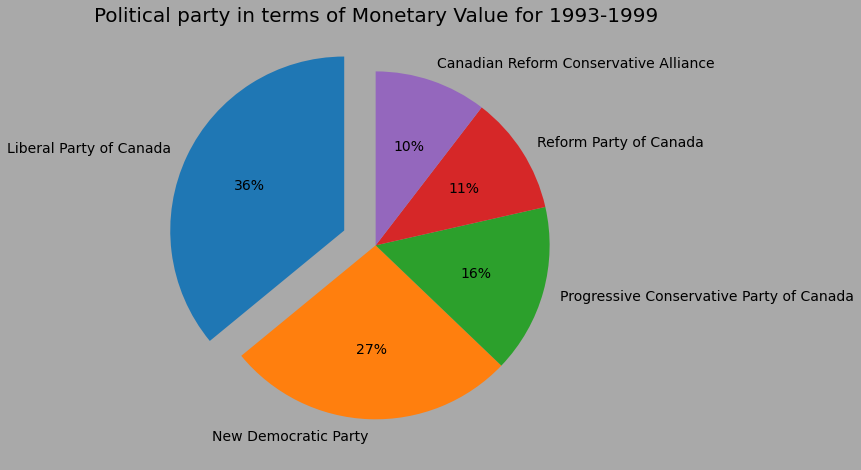

In [61]:
#Top 5 Political Parties from 2000-2004 by Monetary Amount
fig = plt.figure(figsize = (10, 8))
fig.set_facecolor('darkgrey')
myexplode=[0.2,0,0,0,0]
plt.pie(new_frame_93_99_PP['Monetary amount'], labels= new_frame_93_99_PP['Political Party'], startangle=90,autopct='%1.0f%%',explode=myexplode,textprops={'fontsize': 14} )
#plt.legend(overall_results['Results'],loc = 1,facecolor = 'darkgrey', edgecolor = 'darkgrey')
plt.title("Political party in terms of Monetary Value for 1993-1999", fontsize = 20)
plt.show()

In [62]:
new_frame_93_99_Can=df_93_99_common.loc[df_93_99_common['Table_Index_Key'].str.split('_',expand = True)[2]=='candidate']

In [63]:
#Top Candidates in terms of Monetary amount
new_frame_93_99_Can = new_frame_93_99_Can.groupby('Recipient')['Monetary amount'].sum().to_frame()
new_frame_93_99_Can=new_frame_93_99_Can
new_frame_93_99_Can=new_frame_93_99_Can.nlargest(10,'Monetary amount').reset_index()

## Q2. Which candidate had the highest monetary amount and whether that candidate was the winner or not?

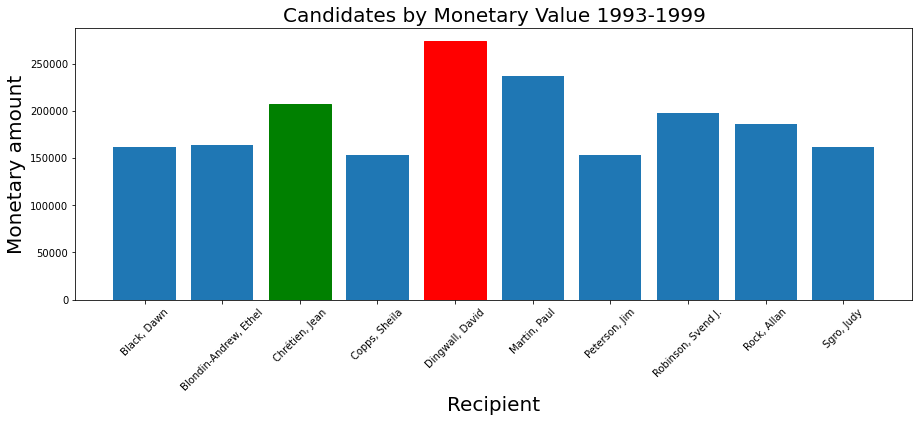

In [64]:
# Candidate in terms of Monetary amount
new_frame_93_99_Can = new_frame_93_99_Can.groupby('Recipient')['Monetary amount'].sum().to_frame()
new_frame_93_99_Can=new_frame_93_99_Can.reset_index()

fig = plt.figure(figsize = (15, 5))
barlist=plt.bar(new_frame_93_99_Can['Recipient'], new_frame_93_99_Can['Monetary amount'])
barlist[2].set_color('g')
barlist[4].set_color('r')
plt.xticks(rotation=45)
plt.xlabel("Recipient", fontsize = 20)
plt.ylabel("Monetary amount", fontsize = 20)
plt.title("Candidates by Monetary Value 1993-1999", fontsize = 20)
plt.show()

# EDA for 2000-2004 datasets

### Q1. Top 5 Political Parties from 2000-2004 by Monetary Amount?

In [65]:
df_20_04_common['Monetary amount']=df_20_04_common['Monetary amount']+df_20_04_common['Non-Monetary amount']

In [66]:
df_20_04_common.drop('Non-Monetary amount',axis=1,inplace=True)

In [67]:
new_frame_20_24_PP = df_20_04_common.groupby('Political Party')['Monetary amount'].sum().to_frame()

In [68]:
new_frame_20_24_PP.head()

,Monetary amount
Political Party,
Bloc Québécois,3083830.04
Canadian Action Party,248861.48
Canadian Reform Conservative Alliance,13425073.13
Christian Heritage Party of Canada,600.00
Communist Party of Canada,304335.64


In [69]:
new_frame_20_24_PP=new_frame_20_24_PP.reset_index()

In [70]:
new_frame_20_24_PP['Monetary amount']=pd.to_numeric(new_frame_20_24_PP['Monetary amount'])
new_frame_20_24_PP=new_frame_20_24_PP.nlargest(5,'Monetary amount')

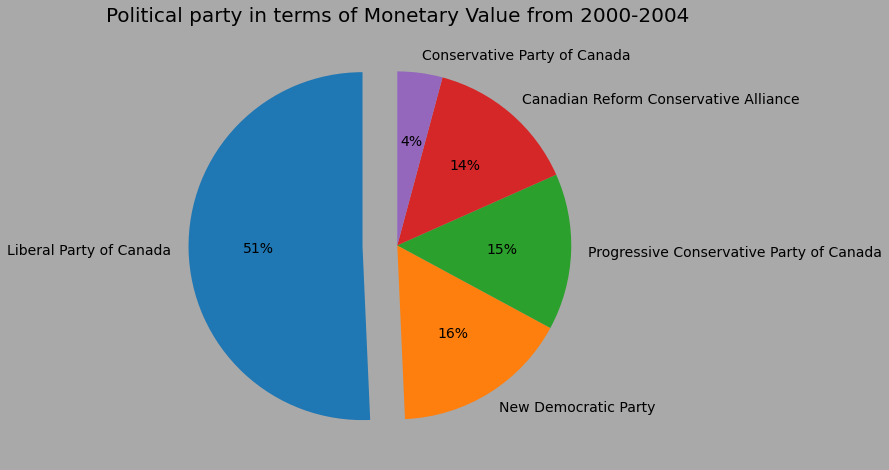

In [71]:
#Top 5 Political Parties from 2000-2004 by Monetary Amount
fig = plt.figure(figsize = (10, 8))
fig.set_facecolor('darkgrey')
myexplode=[0.2,0,0,0,0]
plt.pie(new_frame_20_24_PP['Monetary amount'], labels= new_frame_20_24_PP['Political Party'], startangle=90,autopct='%1.0f%%',explode=myexplode, textprops={'fontsize': 14} )
#plt.legend(overall_results['Results'],loc = 1,facecolor = 'darkgrey', edgecolor = 'darkgrey')
plt.title("Political party in terms of Monetary Value from 2000-2004", fontsize = 20)
plt.show()

### Q2. Top Candidates in terms of Monetary amount?

In [72]:
#Top Candidates in terms of Monetary amount
new_frame_20_24_Can=df_20_04_common.loc[df_20_04_common['Table_Index_Key'].str.split("_",expand=True)[2]=='candidate']
new_frame_20_24_Can = new_frame_20_24_Can.groupby('Recipient')['Monetary amount'].sum().to_frame()


In [73]:
new_frame_20_24_Can=new_frame_20_24_Can.nlargest(10,'Monetary amount').reset_index()
new_frame_20_24_Can

,Recipient,Monetary amount
0,"Mangat, Gurdish",88000.00
1,"Robinson, Svend",82368.95
2,"Gagnon, Sébastien",65000.00
3,"Gaudet, Roger",64200.00
4,"LeBlanc, Dominic",63664.00
5,"Chrétien, Jean",62014.09
6,"Gagliano, Alfonso",61756.50
7,"Eggleton, Art",60000.00
8,"Malhi, Gurbax S.",60000.00
9,"Mills, Bob",60000.00


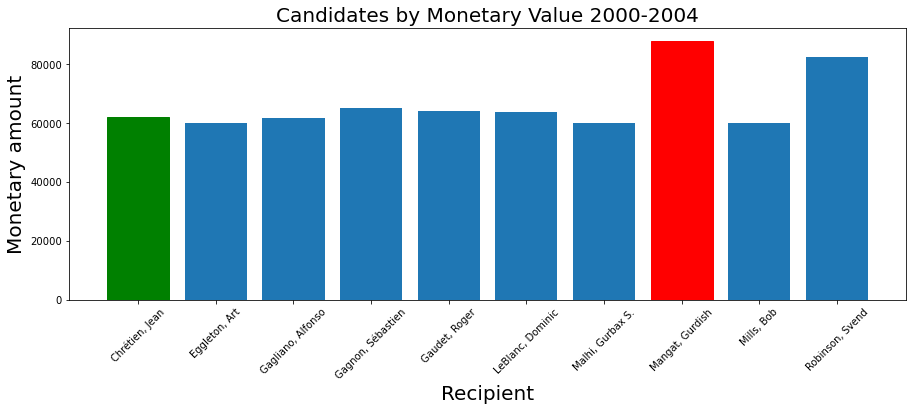

In [74]:
# Candidate in terms of Monetary amount
new_frame_20_24_Can = new_frame_20_24_Can.groupby('Recipient')['Monetary amount'].sum().to_frame()
new_frame_20_24_Can=new_frame_20_24_Can.reset_index()

fig = plt.figure(figsize = (15, 5))
barlist=plt.bar(new_frame_20_24_Can['Recipient'], new_frame_20_24_Can['Monetary amount'])
barlist[0].set_color('g')
barlist[7].set_color('r')
plt.xticks(rotation=45)
plt.xlabel("Recipient", fontsize = 20)
plt.ylabel("Monetary amount", fontsize = 20)
plt.title("Candidates by Monetary Value 2000-2004", fontsize = 20)
plt.show()

### Q4. Share of Monetary amount by Contributor type?

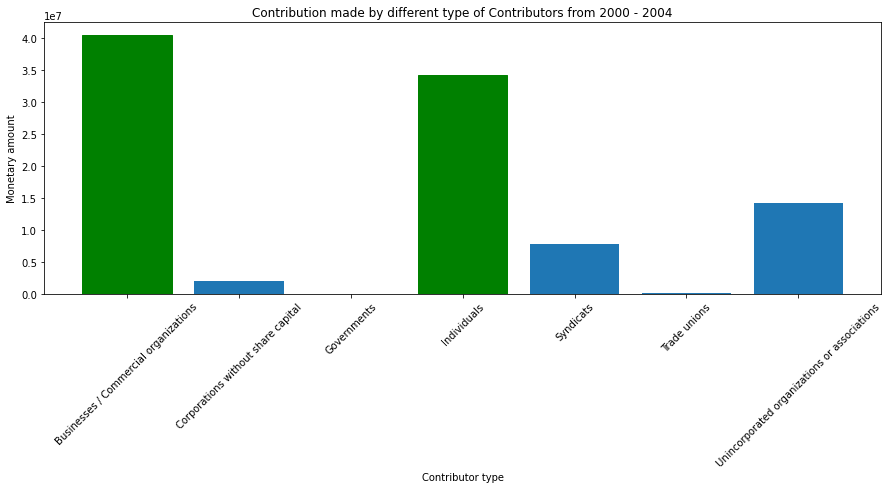

In [75]:
#Contributor type in terms of Monetary amount
new_frame_20_24_Con = df_20_04_common.groupby('Contributor type')['Monetary amount'].sum().to_frame()
new_frame_20_24_Con=new_frame_20_24_Con.reset_index()

fig = plt.figure(figsize = (15, 5))
barlist = plt.bar(new_frame_20_24_Con['Contributor type'], new_frame_20_24_Con['Monetary amount'])
barlist[0].set_color('g')
barlist[3].set_color('g')
plt.xticks(rotation=45)
plt.xlabel("Contributor type")
plt.ylabel("Monetary amount")
plt.title("Contribution made by different type of Contributors from 2000 - 2004")
plt.show()


In [76]:
df_20_04_common['Monetary amount']=df_20_04_common['Monetary amount'].fillna(0)

In [77]:
df_20_04_common['Contributor type'].value_counts()

Individuals                                     102495
Businesses / Commercial organizations            31402
Unincorporated organizations or associations      4778
Syndicats                                         1477
Corporations without share capital                 548
Trade unions                                       108
Governments                                         68
Name: Contributor type, dtype: int64

In [78]:
df_temp_5 = df_20_04_common
df_temp_5['Money Range'] = pd.qcut(df_temp_5['Monetary amount'],q=5,duplicates='drop')
df_temp_5.head(100)

,Recipient,Contributor name,Contribution given through,Political Entity,Political Party,Financial Report,Part Number of Return,Contributor City,Contributor type,Form ID,Fiscal date,Contributor Province,Contributor Postal code,Monetary amount,Type of organization that contribution was given through,Recipient ID,Financial Report part,Table_Index_Key,Electoral event,Money Range
0,"Morgan, Jim",Provincial Paving Ltd.,NaN,Candidate,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,St. John's,Businesses / Commercial organizations,20120,2000-11-27,NF,A1A 4G7,0.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
1,"Morgan, Jim",J-1 Contracting Ltd.,NaN,Candidate,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,0.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
2,"Morgan, Jim",Fewers Funeral Home Ltd.,NaN,Candidate,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,0.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
3,"Morgan, Jim",Five Bays Lodge,NaN,Candidate,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,Clarenville,Businesses / Commercial organizations,20120,2000-11-27,NF,A0E 1J0,0.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
4,"Morgan, Jim",David McKay,NaN,Candidate,Progressive Conservative Party of Canada,Candidate's Electoral Campaign Return,5,St. John's,Individuals,20120,2000-11-27,NF,A1E 4Y3,0.0,NaN,1,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Tobin, Brian",ELI LILLY CANADA INC.,NaN,Candidate,Liberal Party of Canada,Candidate's Electoral Campaign Return,5,SCARBOROUGH,Businesses / Commercial organizations,20120,2000-11-27,ON,M1N2E8,0.0,NaN,3,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
96,"Tobin, Brian",THOMAS & SANDRA FENNELLY,NaN,Candidate,Liberal Party of Canada,Candidate's Electoral Campaign Return,5,ST.JOHN`S,Individuals,20120,2000-11-27,NF,A1BT5,0.0,NaN,3,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
97,"Tobin, Brian",NANCEY & NORRDIN NANJI,NaN,Candidate,Liberal Party of Canada,Candidate's Electoral Campaign Return,5,WEST VANCOUVER,Individuals,20120,2000-11-27,BC,V7S3H1,0.0,NaN,3,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"
98,"Tobin, Brian",EAMONN PERCY,NaN,Candidate,Liberal Party of Canada,Candidate's Electoral Campaign Return,5,VANCOUVER,Individuals,20120,2000-11-27,BC,V6P5R1,0.0,NaN,3,Details of Monetary Contributions,20_04_candidate,THIRTY-SEVENTH GENERAL ELECTION,"(-0.001, 210.0]"


In [79]:
df_temp_5['Money Range']=df_temp_5['Money Range'].astype(str)

In [80]:
df_temp_5['Money Range'].value_counts()

(-0.001, 210.0]       58712
(550.0, 4243584.0]    28135
(300.0, 550.0]        27498
(210.0, 300.0]        26593
Name: Money Range, dtype: int64

In [81]:
df_temp_5.loc[df_temp_5['Money Range']=='(-0.001, 210.0]', 'Money range Counts'] = 58712
df_temp_5.loc[df_temp_5['Money Range']=='(550.0, 4243584.0]', 'Money range Counts'] = 28135
df_temp_5.loc[df_temp_5['Money Range']=='(300.0, 550.0]', 'Money range Counts'] = 27498
df_temp_5.loc[df_temp_5['Money Range']=='(210.0, 300.0]', 'Money range Counts'] = 26593
df_temp_5['Money range Counts']=df_temp_5['Money range Counts'].astype(int)
df_temp_5['Monetary amount']=df_temp_5['Monetary amount'].astype(int)

Text(0.5, 1.0, 'Contributor type Vs Money Range Count')

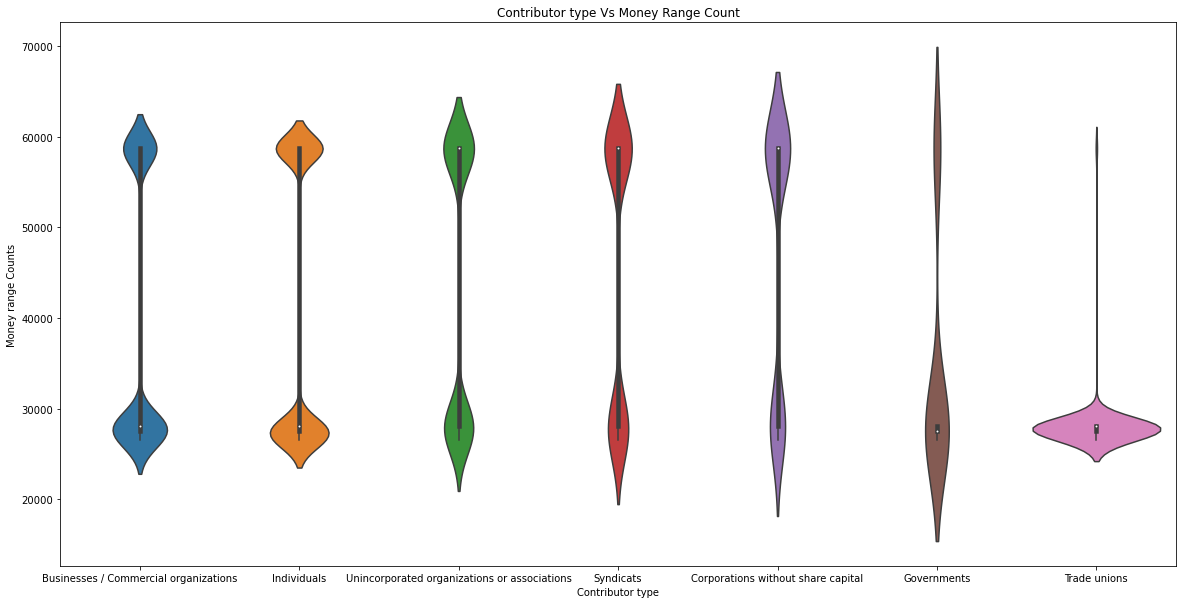

In [82]:
fig = plt.figure(figsize = (20, 10))
ax = sns.violinplot(x=df_temp_5['Contributor type'], y=df_temp_5['Money range Counts'])
ax.set_title("Contributor type Vs Money Range Count")

In [83]:
df_93_99_common.columns

Index(['Recipient', 'Political Party', 'Contributor type', ' Contributor name',
       'Financial Report', 'Recipient ID', 'Financial Report part',
       'Political Entity', 'Fiscal date', 'Table_Index_Key', 'Electoral event',
       'Monetary amount'],
      dtype='object')

In [84]:
df_20_04_common.columns

Index(['Recipient', ' Contributor name', 'Contribution given through',
       'Political Entity', 'Political Party', 'Financial Report',
       'Part Number of Return', 'Contributor City', 'Contributor type',
       'Form ID', 'Fiscal date', 'Contributor Province',
       'Contributor Postal code', 'Monetary amount',
       'Type of organization that contribution was given through',
       'Recipient ID', 'Financial Report part', 'Table_Index_Key',
       'Electoral event', 'Money Range', 'Money range Counts'],
      dtype='object')

In [85]:
df_current.columns

Index(['Recipient ID', 'Recipient', 'Political Party of Recipient',
       'Electoral District', 'Electoral event', 'Fiscal/Election date',
       'Form ID', 'Financial Report', 'Part Number of Return',
       'Financial Report part', 'Contributor type', 'Contributor name',
       'Contributor City', 'Contributor Province', 'Contributor Postal code',
       'Contribution Received date', 'Monetary amount',
       'Contribution given through', 'Political Entity'],
      dtype='object')

In [86]:
df_20_04_party.to_csv("df_20_04_party.csv", index = False)


In [87]:
df_20_04_candidate.to_csv("df_20_04_candidate.csv", index = False)


In [88]:
df_20_04_common.to_csv("df_20_04_common.csv", index = False)

In [89]:
df_93_99_party.to_csv("df_93_99_party.csv", index = False)

In [90]:
df_93_99_candidate.to_csv("df_93_99_candidate.csv", index = False)

In [91]:
df_93_99_common.to_csv("df_93_99_common.csv", index = False)

In [92]:
df_current.to_csv("df_current.csv", index = False)

In [93]:
df_current_copy=df_current[['Political Party of Recipient','Monetary amount','Contributor Province']].copy()

In [94]:
df_current_copy_gb=df_current_copy.groupby(['Political Party of Recipient','Contributor Province'])


In [95]:
df_current_copy

,Political Party of Recipient,Monetary amount,Contributor Province
0,Liberal Party of Canada,400.00,QC
1,Liberal Party of Canada,500.00,QC
2,Liberal Party of Canada,2500.00,QC
3,Liberal Party of Canada,500.00,QC
4,Liberal Party of Canada,400.00,QC
...,...,...,...
3360053,New Democratic Party,1530933.47,NaN
3360054,New Democratic Party,1523874.48,NaN
3360055,New Democratic Party,5404938.05,NaN
3360056,New Democratic Party,5603.50,NaN


In [96]:
df_current_gb_df=df_current_copy_gb['Monetary amount'].sum().to_frame().reset_index()

In [97]:
index=df_current_gb_df[df_current_gb_df['Contributor Province']=='RG'].index
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*Q.*$)', 'QC')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*q.*$)', 'QC')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*P.*$)', 'PEI')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*S.*$)', 'SK')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*s.*$)', 'SK')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*B.*$)', 'BC')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*b.*$)', 'BC')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*O.*$)', 'ON')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*o.*$)', 'ON')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*A.*$)', 'AB')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*M.*$)', 'MB')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*NE.*$)', 'NS')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*Nu.*$)', 'NU')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*NFLD.*$)', 'NL')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*NL.*$)', 'NL')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*VT.*$)', 'YT')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*CT.*$)', 'YT')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*YK.*$)', 'YT')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*Nl.*$)', 'NL')
df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*NWT.*$)', 'NT')

<ipython-input-97-602cc361cea7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*Q.*$)', 'QC')
<ipython-input-97-602cc361cea7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*q.*$)', 'QC')
<ipython-input-97-602cc361cea7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*P.*$)', 'PEI')
<ipython-input-97-602cc361cea7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_current_gb_df['Contributor Province']=df_current_gb_df['Contributor Province'].str.replace(r'(^.*S.*$)', 'SK')
<ipython-input-97-6

In [98]:
#df_current_gb_df.drop(index,inplace=True)

In [99]:
df_current_gb_df['Contributor Province'].unique()

array(['BC', 'QC', 'NL', 'SK', 'NT', 'ON', 'PEI', 'YT', 'AB', 'NU', ',',
       '-', '.', '...', 'IL', 'IN', 'MB', 'NS', 'NY', 'RG ', 'TX', 'XXX',
       'x', '"', '0N', 'xx', '**', '***', 'CW', 'FL', 'France', 'NJ',
       'ny', 'NF', 'XX', 'xxxx'], dtype=object)

In [100]:
df_current_gb_latest = df_current_gb_df.copy()

In [101]:
df_current_gb_latest=df_current_gb_latest.groupby(['Political Party of Recipient','Contributor Province'])['Monetary amount'].sum().to_frame()

In [102]:
df_current_gb_latest=df_current_gb_latest.reset_index()

In [103]:
df_current_gb_latest['Contributor Province'].unique()

array(['BC', 'QC', 'NL', 'NT', 'ON', 'PEI', 'SK', 'YT', 'AB', 'NU', ',',
       '-', '.', '...', 'IL', 'IN', 'MB', 'NS', 'NY', 'RG ', 'TX', 'XXX',
       'x', '"', '0N', 'xx', '**', '***', 'CW', 'FL', 'France', 'NJ',
       'ny', 'NF', 'XX', 'xxxx'], dtype=object)

In [104]:
df_current_gb_latest['Contributor Province']=df_current_gb_latest['Contributor Province'].str.replace('0N', 'ON')

In [105]:
df_current_CP=df_current_gb_latest.groupby(['Contributor Province']).max()
df_current_CP=df_current_CP.reset_index()
df_current_CP.to_csv("Choropleth data Current.csv")

In [106]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [107]:
df_current_CP

,Contributor Province,Political Party of Recipient,Monetary amount
0,"""",Green Party of Canada,2.500000e+01
1,**,New Democratic Party,3.440000e+03
2,***,New Democratic Party,8.000000e+02
3,",",Liberal Party of Canada,7.000000e+02
4,-,Conservative Party of Canada,3.000000e+02
5,.,New Democratic Party,4.813490e+04
6,...,Liberal Party of Canada,1.622500e+03
7,AB,New Democratic Party,1.101357e+04
8,BC,Western Block Party,9.592534e+07
9,CW,Liberal Party of Canada,2.500000e+02


In [108]:
#Group by political party
df_current_PP=df_current_gb_latest.reset_index().copy()
df_current_PP.drop(columns=['Contributor Province'],axis=1,inplace=True)
df_current_PP_1=df_current_PP.groupby('Political Party of Recipient')['Monetary amount'].sum().to_frame()
#new_frame_20_24_PP = df_20_04_common.groupby('Political Party')['Monetary amount'].sum().to_frame()
#df_current_PP.drop(columns='index',axis=1,inplace=True)
#df_current_PP.sort_values(by=['Monetary amount'], ascending=False)
df_current_PP_1=df_current_PP_1.reset_index()
df_current_PP_1=df_current_PP_1.sort_values(by=['Monetary amount'],ascending=False)

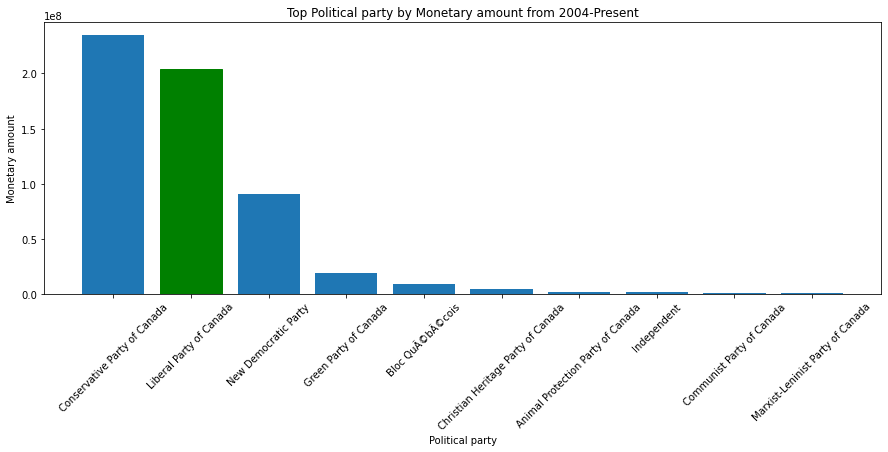

In [109]:

df_current_PP_1=df_current_PP_1.nlargest(10,'Monetary amount')

fig = plt.figure(figsize = (15, 5))
barlist = plt.bar(df_current_PP_1['Political Party of Recipient'], df_current_PP_1['Monetary amount'])
barlist[1].set_color('g')
plt.xticks(rotation=45)
plt.xlabel("Political party")
plt.ylabel("Monetary amount")
plt.title("Top Political party by Monetary amount from 2004-Present")
plt.show()

Text(0.5, 1.0, 'Contributor type Vs Money Range Count')

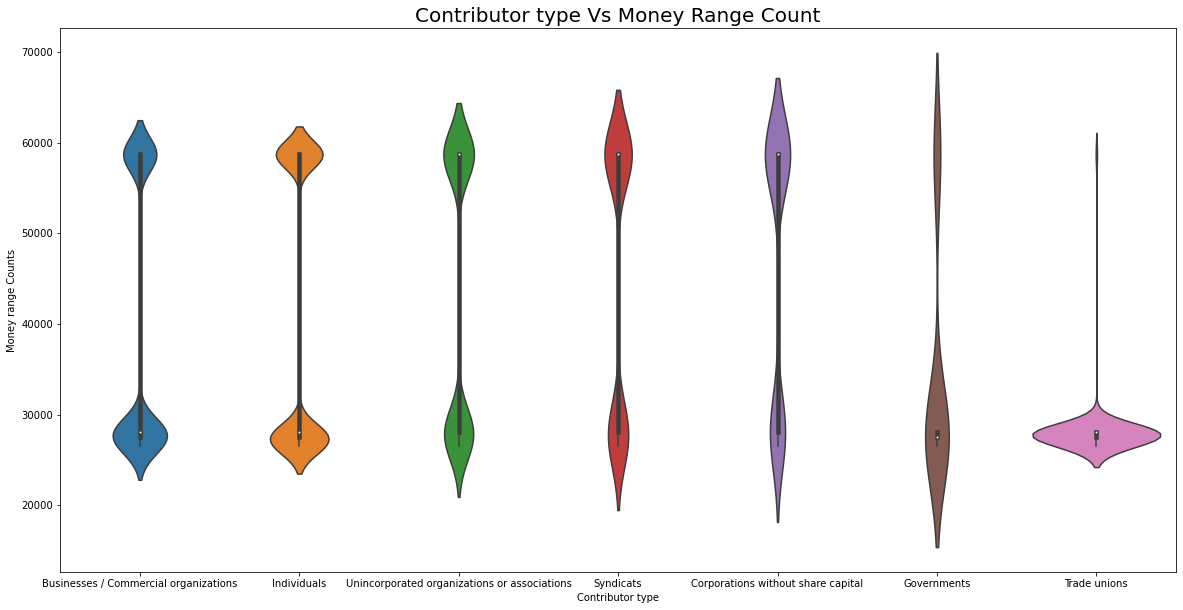

In [110]:
fig = plt.figure(figsize = (20, 10))
ax = sns.violinplot(x=df_temp_5['Contributor type'], y=df_temp_5['Money range Counts'])
ax.set_title("Contributor type Vs Money Range Count", fontsize = 20)

In [196]:

df_current_PP_1

,Political Party of Recipient,Monetary amount
7,Conservative Party of Canada,2.346495e+08
12,Liberal Party of Canada,2.037491e+08
17,New Democratic Party,9.055530e+07
10,Green Party of Canada,1.929507e+07
2,Bloc QuÃ©bÃ©cois,9.211826e+06


In [205]:
df_current_PP_1=df_current_PP_1.iloc[:5,:]
df_current_PP_1["Political Party of Recipient"]=df_current_PP_1["Political Party of Recipient"].replace("Bloc QuÃ©bÃ©cois","Bloc Québécois")
df_current_PP_1

,Political Party of Recipient,Monetary amount
7,Conservative Party of Canada,2.346495e+08
12,Liberal Party of Canada,2.037491e+08
17,New Democratic Party,9.055530e+07
10,Green Party of Canada,1.929507e+07
2,Bloc Québécois,9.211826e+06


<html>
<head>
<center><table bgcolor="#ff00ff"></table></center>

  </head>
  <body>
    <table>
      <tr>
        <th>Sr. No</th>
        <th>Roll No</th>
        <th>Name</th>
        <th>Team</th>
      </tr>
      <tr>
        <th>1</th>
        <td>1001</td>
        <td>John</td>
        <td>Red</td>
      </tr>
      <tr>
        <th>2</th>
        <td>1002</td>
        <td>Peter</td>
        <td>Blue</td>
      </tr>
      <tr>
        <th>3</th>
        <td>1003</td>
        <td>Henry</td>
        <td>Green</td>
      </tr>
    </table>
</body>
</html>


In [206]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [207]:
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_current_PP_1), endpoint=False)

# Cumulative length
LENGTHS = df_current_PP_1["Monetary amount"].values/50000



# Region label
REGION = df_current_PP_1["Political Party of Recipient"].values

# Number of tracks per region
TRACKS_N = df_current_PP_1["Monetary amount"].values

In [208]:
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

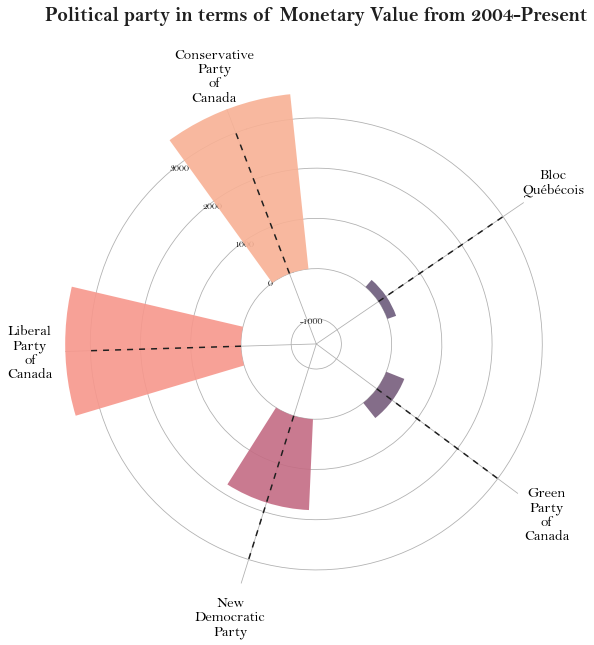

In [210]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)




# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=15);
ax.set_title("Political party in terms of Monetary Value from 2004-Present\n", fontsize= 20, fontweight = "bold")
# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(25)


In [183]:
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(new_frame_93_99_PP), endpoint=False)

# Cumulative length
LENGTHS = new_frame_93_99_PP['Monetary amount'].values/30000



# Region label
REGION = new_frame_93_99_PP["Political Party"].values

# Number of tracks per region
TRACKS_N = new_frame_93_99_PP["Monetary amount"].values

In [184]:
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

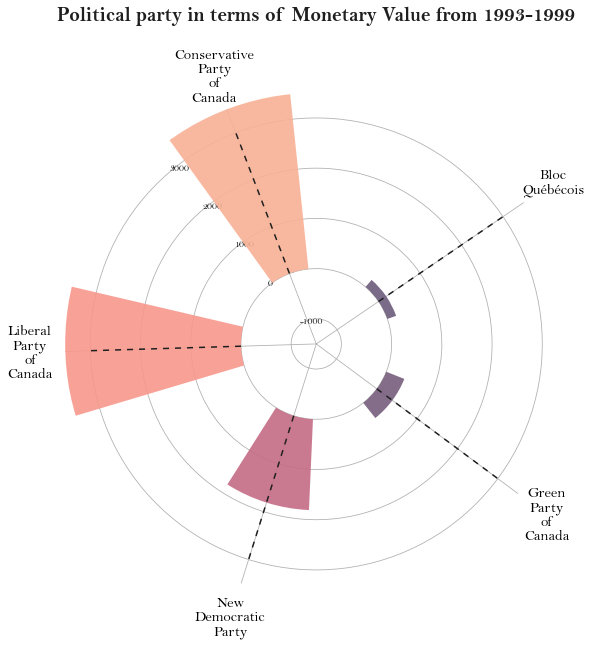

In [212]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)




# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=15);
ax.set_title("Political party in terms of Monetary Value from 1993-1999\n", fontsize= 20, fontweight = "bold")
# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(25)


In [225]:
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(new_frame_20_24_PP), endpoint=False)

# Cumulative length
LENGTHS = new_frame_20_24_PP['Monetary amount'].values/10000



# Region label
REGION = new_frame_20_24_PP["Political Party"].values

# Number of tracks per region
TRACKS_N = new_frame_20_24_PP["Monetary amount"].values

In [226]:
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

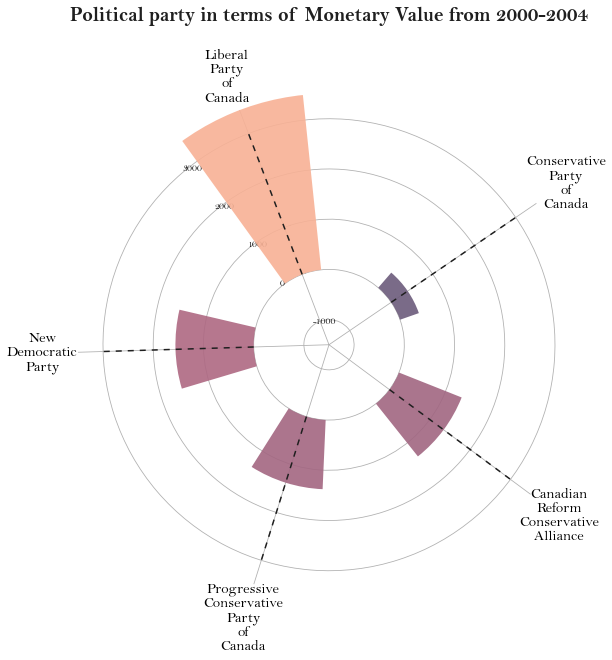

In [228]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)




# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=15);
ax.set_title("Political party in terms of Monetary Value from 2000-2004\n", fontsize= 20, fontweight = "bold")
# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(25)
